<a href="https://colab.research.google.com/github/Sasidhar003/Python/blob/main/IP_Opening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
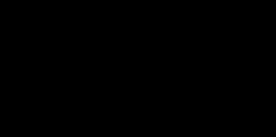

In [11]:
import cv2
import numpy as np
import copy

def erosion(img, p_size,I_size):
  I1 = copy.deepcopy(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] > 125:
        img[i][j] = 255
      else:
        img[i][j] = 0
  for i in range(img.shape[0] - (p_size[0] -1)):
    for j in range(img.shape[1] - (p_size[1] -1)):
      output = np.zeros(p_size)
      for k in range(p_size[0]):
        for l in range(p_size[1]):
          output[k, l]  = img[i+k, j+l]
      k = np.sum(output)
      if k>0:
        for k in range(p_size[0]):
          for m in range(p_size[1]):
            I1[i+k,j+m] = 255
  cv2.imwrite('opening_AAA.png',I1)

def dilation(img, p_size):
  I1 = copy.deepcopy(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] > 125:
        img[i][j] = 255
      else:
        img[i][j] = 0
  for i in range(img.shape[0] - (p_size[0] -1)):
    for j in range(img.shape[1] - (p_size[1] -1)):
      output = np.zeros(p_size)
      for k in range(p_size[0]):
        for l in range(p_size[1]):
          output[k, l]  = I1[i+k, j+l]
      k = np.sum(output)
      if k < (p_size[0]*p_size[1]*255):
        for k in range(p_size[0]):
          for m in range(p_size[1]):
            I1[i+k,j+m] = 0
  return I1

img = cv2.imread('/content/A_closing (1).png', 0)
I_size = img.shape
p_size =[3,3]
I1 = erosion(img, p_size,I_size)
dilation(img, p_size)